# Object Detection Tasks
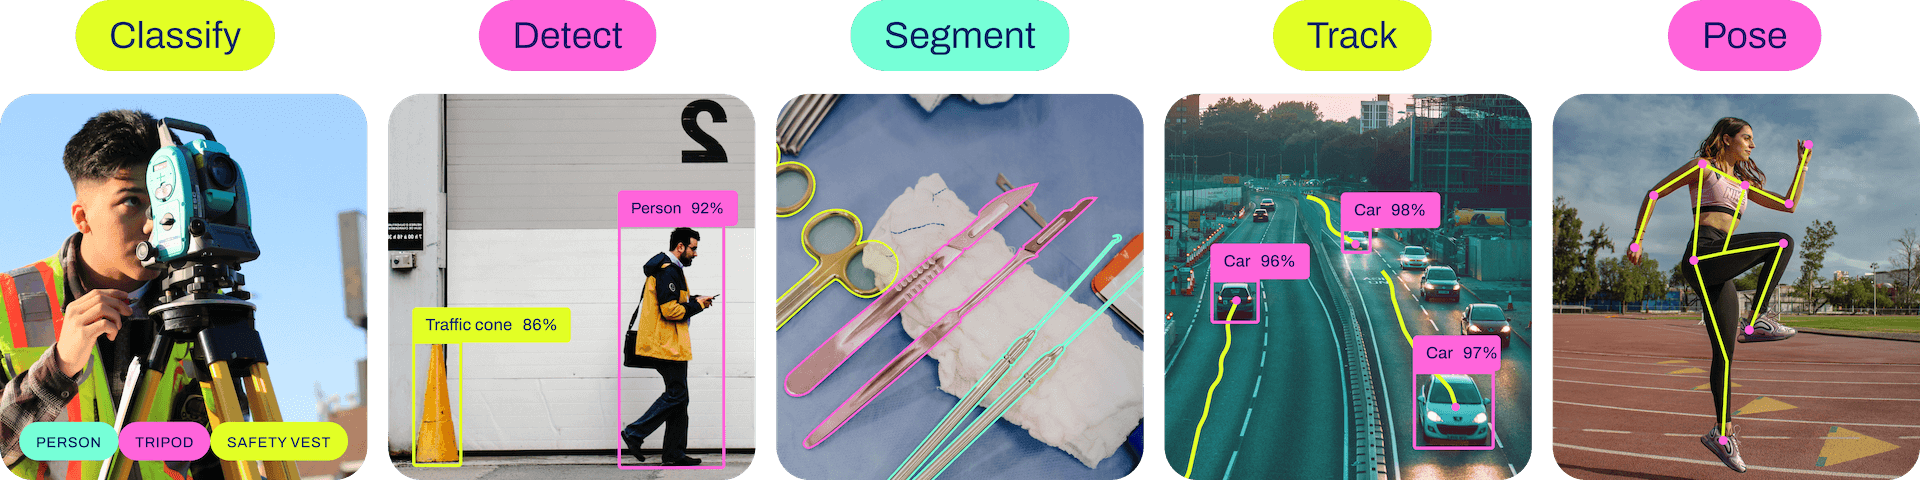

# Haar Cascades

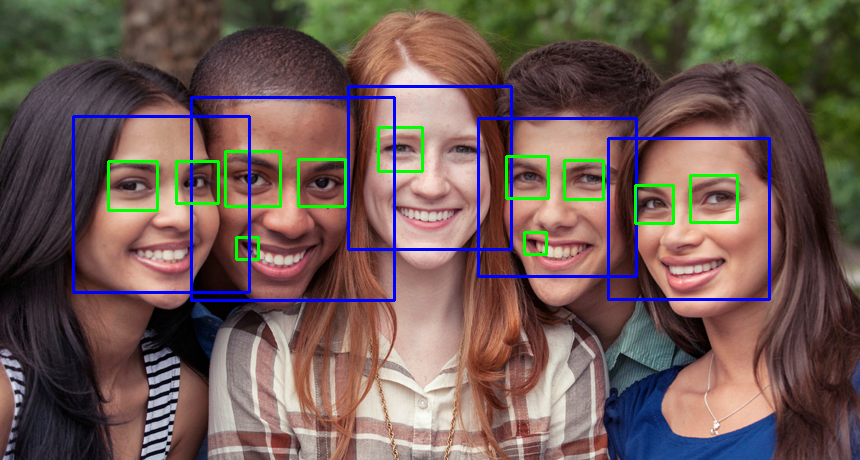

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
img = cv2.imread("paste file link")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2_imshow(img)

## TL;DR
* Haar cascades are machine learning object detection algorithms, which are now outdated.
* They use use Haar features to determine the likelihood of a certain point being part of an object.
* Boosting algorithms are used to produce a strong prediction out of a combination of “weak” learners.
* Cascading classifiers are used to run boosting algorithms on different subsections of the input image.
* Make sure to optimize against false negatives for Haar cascades.
* Use OpenCV for implementing a Haar cascade model yourself.

# YOLO (You Only look Once)

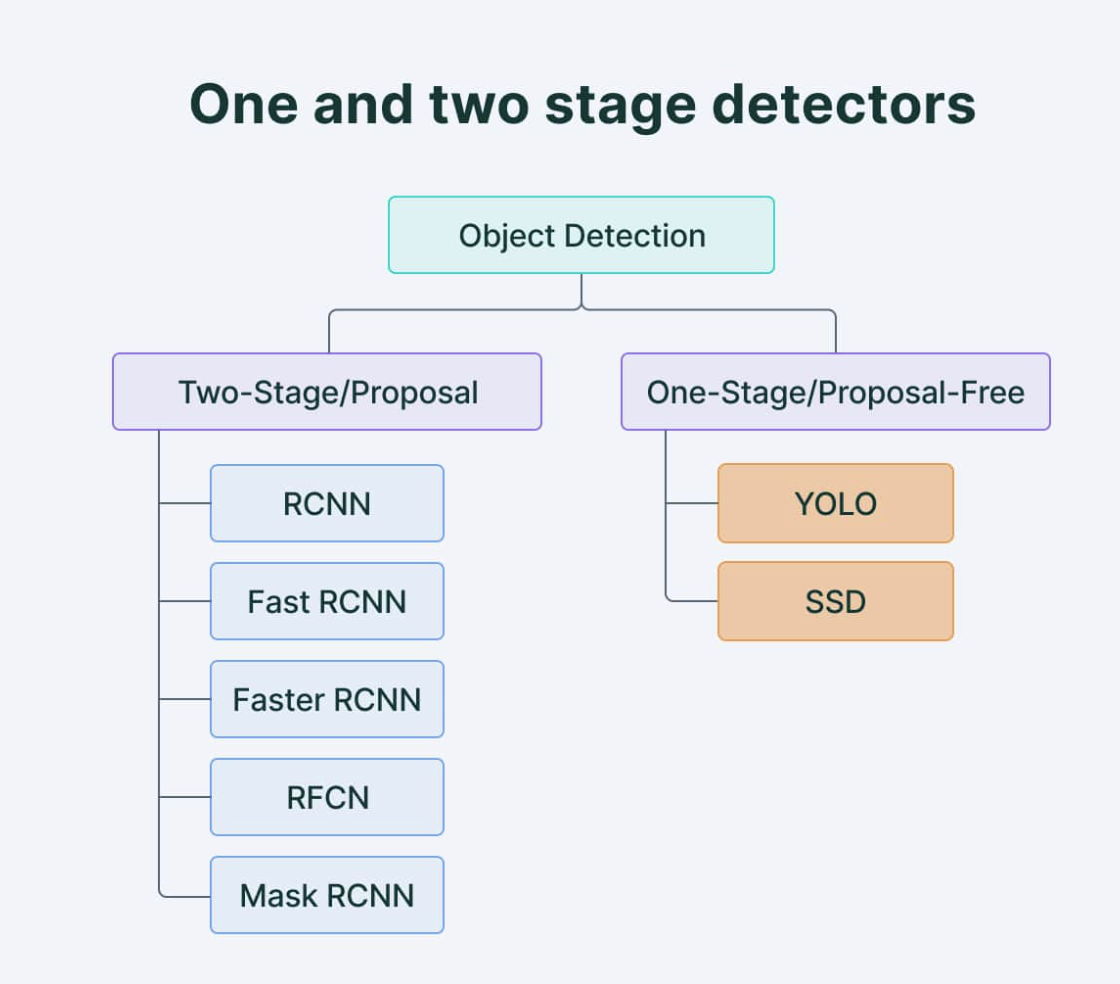

### IoU (Intersection over Union)
Intersection over Union is a popular metric to measure localization accuracy and calculate localization errors in object detection models. <br>
To calculate the IoU between the predicted and the ground truth bounding boxes, we first take the intersecting area between the two corresponding bounding boxes for the same object. Following this, we calculate the total area covered by the two bounding boxes— also known as the “Union” and the area of overlap between them called the “Intersection.”

The intersection divided by the Union gives us the ratio of the overlap to the total area, providing a good estimate of how close the prediction bounding box is to the original bounding box.

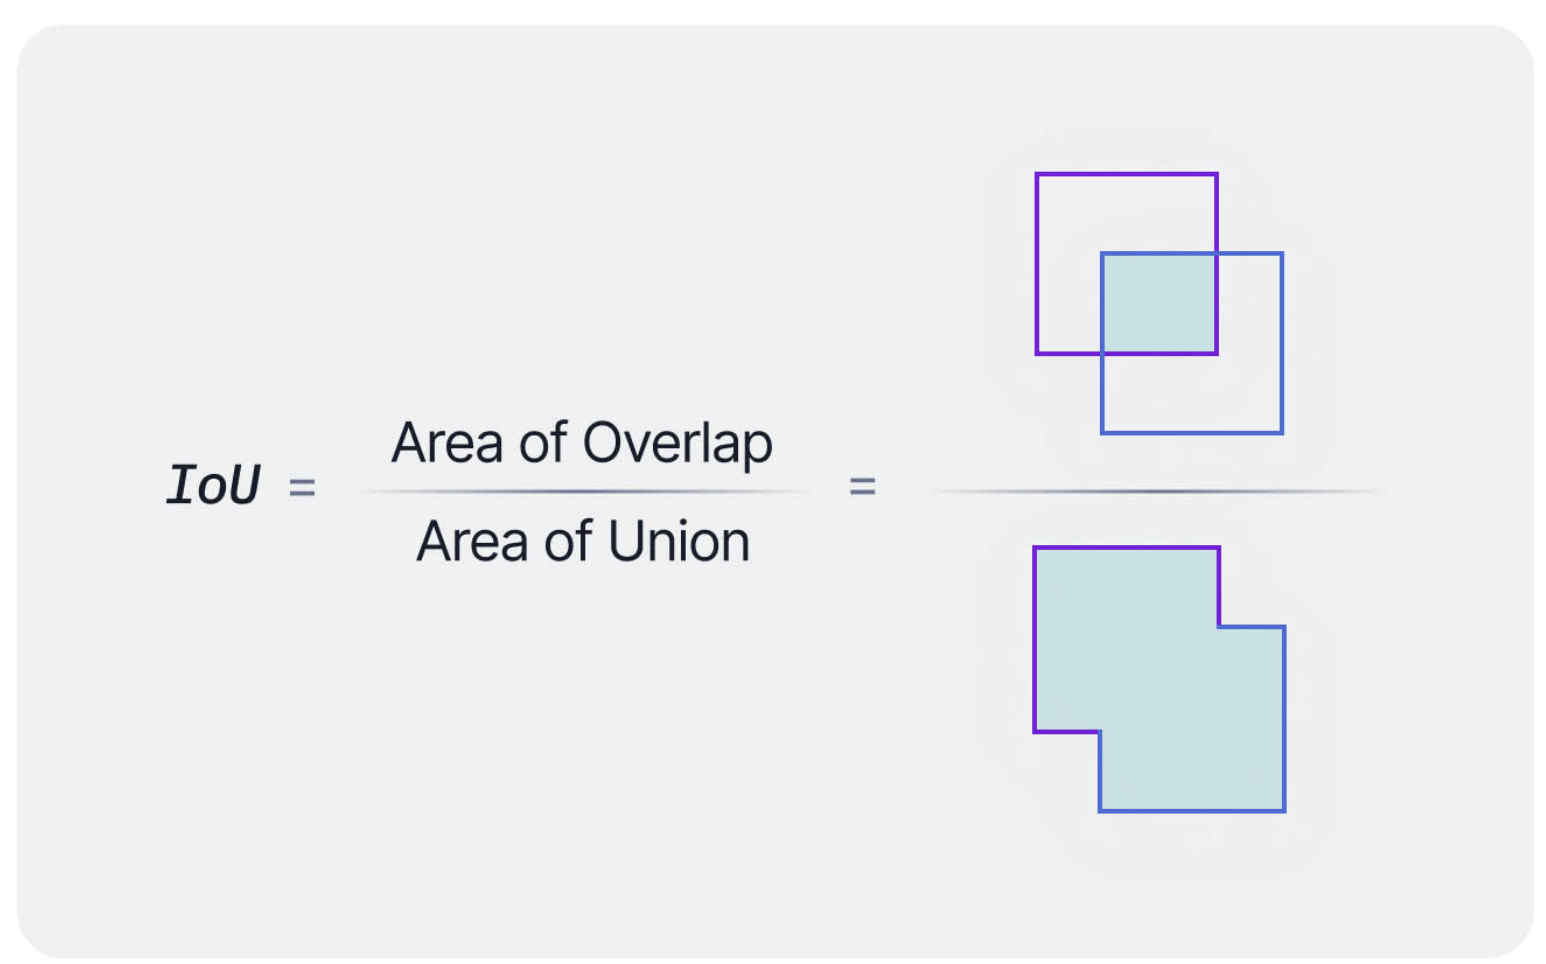

In object detection,  precision and recall aren’t used for class predictions. Instead, they serve as predictions of boundary boxes for measuring the decision performance. An IoU value > 0.5. is taken as a positive prediction, while an IoU value < 0.5 is a negative prediction.

### YOLO Architecture
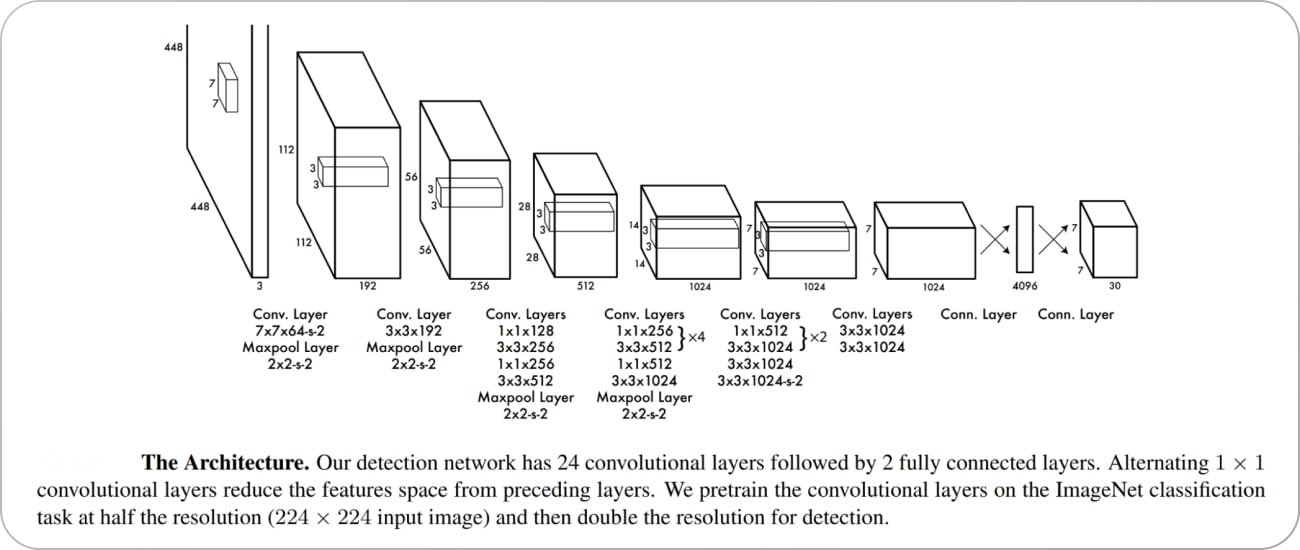

One key technique used in the YOLO models is **non-maximum suppression (NMS)**. NMS is a post-processing step that is used to improve the accuracy and efficiency of object detection. In object detection, it is common for multiple bounding boxes to be generated for a single object in an image. These bounding boxes may overlap or be located at different positions, but they all represent the same object. NMS is used to identify and remove redundant or incorrect bounding boxes and to output a single bounding box for each object in the image.



### YOLO Timeline
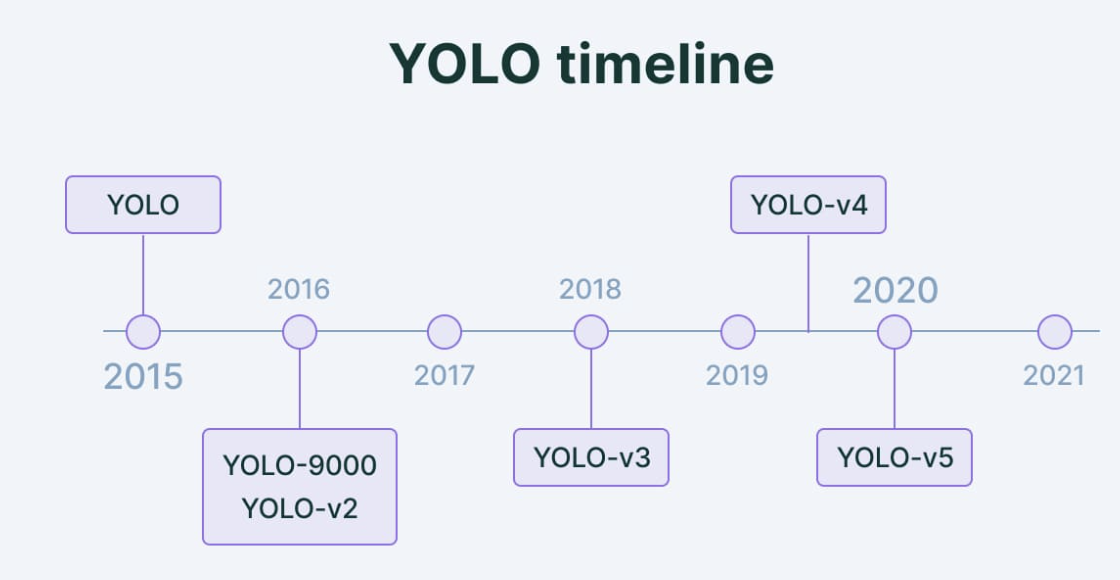

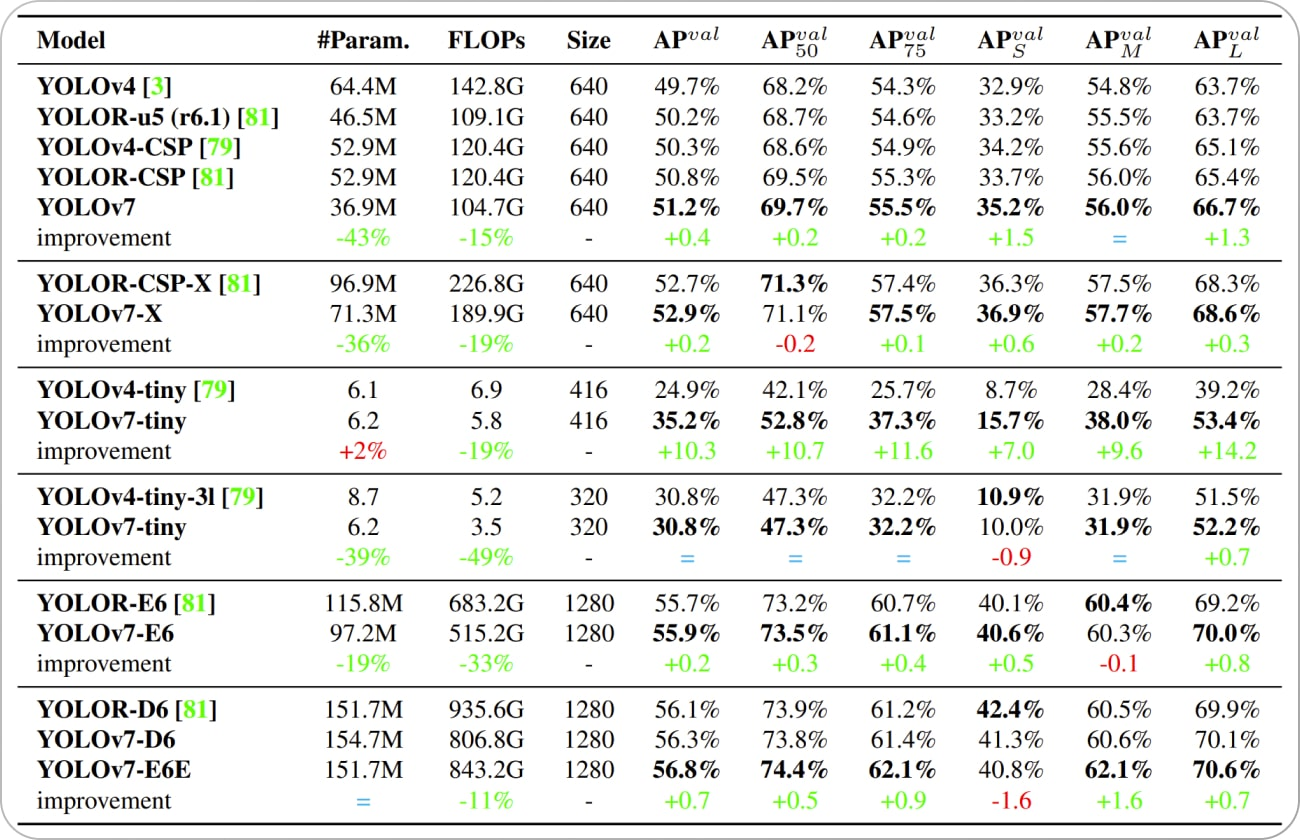

# Playing with Yolo v8

### 0. Setup

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/107.7 GB disk)


### 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 204.0ms
Speed: 5.3ms preprocess, 204.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### 2. Validate
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits.

In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:03<00:00, 239MB/s]


In [ ]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 8.76MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 4102.25file/s]
Dataset download success ✅ (0.6s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 11.9MB/s]
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 801.74it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.20s/it]
                   all          4         17      0.621      0.833      0.888       0.63
                person          4         10      0.721        0.5      0.519      0.269
 

# Training YOLO v8 on custom dataset:
* https://docs.ultralytics.com/modes/train/
* https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=3C3EO_2zNChu